# Basic probability

Python activities to complement [*Measurements and their Uncertainties*](http://www.oupcanada.com/catalog/9780199566334.html) (*MU*), Chapter 3, "Uncertainties as probabilities."

* [Preliminaries](#Preliminaries)
* [Probability calculations](#Probability-calculations)
    * [Probability calculations with the uniform distribution](#Probability-calculations-with-the-uniform-distribution)
        * [Programming notes 1](#Programming-notes-1)
        * [Programming notes 2](#Programming-notes-2)
        * [Programming notes 3](#Programming-notes-3)
        * [Programming notes 4](#Programming-notes-4)
    * [Exercise 1](#Exercise-1)
    * [Exercise 2](#Exercise-2)
    * [Probability calculations with the normal distribution](#Probability-calculations-with-the-normal-distribution)
        * [Programming notes 5](#Programming-notes-5)
    * [Exercise 3](#Exercise-3)
    * [Outliers, or: Chauvenet is dead. Let his criterion die with him.](#Outliers,-or&#58;-Chauvenet-is-dead.-Let-his-criterion-die-with-him.)
* [The Poisson distribution](#The-Poisson-distribution)
* [The central limit theorem](#The-central-limit-theorem)
* [Summary](#Summary)
* [Further reading](#Further-reading)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](2.0-Basic-statistics.ipynb) and read *MU* Ch. 3, "Uncertainties as probabilities," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Uncertainties_as_probabilities) in mind.

1. Be able to explain what a probability distribution function $P_\text{DF}(x)$ represents and why Eqs. (3.1) - (3.6) follow from its definition.
2. Be able to recall and use Eqs. (3.1) - (3.3) to perform simple probability calculations for an arbitrary $P_\text{DF}(x)$, including:
    1. Check that $P_\text{DF}(x)$ is properly normalized, and identify the correct normalization factor if it is not;
    2. Evaluate the expectation value of a function $f(x)$; and
    3. Evaluate the expectation value of the mean and the variance.
3. Be able to recall the definitions (3.7) and (3.8) of the Gaussian probability distribution function and the error function, respectively, and know how to use the error function in simple probability calculations like the one given in Sec. 3.2.2.
4. Be aware of the rules described in Sec. 3.3.2 for rejecting outliers, be able to follow a well-defined procedure for doing so, and be able to suggest alternatives to throwing away data points.
5. Be able to describe the basic properties of a Poisson distribution $P(N;\bar{N})$, including:
    1. its functional form;
    2. the kind of experimental data that will be described by it;
    3. the expectation values of its mean and variance; and
    4. the Gaussian probability distribution that approximates it for $N\rightarrow\infty$.
6. Be able to sketch a Poisson distribution for a given mean and standard deviation, and be able to estimate the mean and standard deviation from the plot of a Poisson distribution.
7. Be able to state the central limit theorem and recognize how it is used to justify the assumption of Gaussian errors in many experiments.

The following code cell includes the usual initialization commands, updated to load the normal distribution object `norm`.

In [1]:
import numpy as np
from numpy import random
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

## Probability calculations
*MU* Sec. 3.1 lists three integral expressions that describe important properties of a continuous PDF.

Eq. (3.1) is a *normalization condition* that ensures that the probability summed over all possible outcomes is one:

<a id="MU(3.1)"></a>$$ \int_{-\infty}^{\infty}\text{d}x\,P_\text{DF}(x) = 1.$$

Eq. (3.2) allows us to predict the probabilities of specific outcomes:

<a id="MU(3.2)"></a>$$P(x_1 \le x \le x_2) = \int_{x_1}^{x_2}\text{d}x\,P_\text{DF}(x).$$

Eq. (3.3) expresses the *expectation* of $x^n$, given by the weighted average

<a id="MU(3.3)"></a>$$ \left\langle x^n\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,x^n P_\text{DF}(x), $$

where we use the $\langle x^n\rangle$ notation discussed in the [previous notebook](2.0-Basic-statistics.ipynb#Determining-the-mean-and-variance-from-the-distribution) instead of the overline notation $\overline{x^n}$ used in *MU*. This quantity is also called the $n$th moment of $x$.

We can also generalize Eq. (3.3) to describe the expectation of an arbitrary *function*, $f(x)$,

<a id="<f(x)>"></a>$$ \left\langle f(x)\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,f(x) P_\text{DF}(x). $$

Finally, *MU* Eq. (3.6) gives a useful identity, proven in *MU* Eq. (3.5),

<a id="MU(3.6)"></a>$$ \sigma^2 = \langle(x-\mu)^2\rangle = \langle x^2\rangle - \langle x\rangle^2. $$

Usually we will evaluate these expressions numerically, not analytically, and there are several SciPy routines to help with this.

### Probability calculations with the uniform distribution
The uniform distribution is appropriate for measurements with discrete precision (see *MU*, Sec. 1.3.2), and you evaluated the integral in *MU* Eq. (3.2) by hand for the standard uniform distribution $\mathcal{U}(x;0,1)$ in [Exercise  3](2.0-Basic-statistics.ipynb#Exercise-3) of the last notebook. The following code cell shows how to do this numerically for $P(0.0 \le x \le 0.5)$.

#### Programming notes 1
The first line imports the [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) distribution object from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), and the second line imports [`quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html), which is short for [quadrature](https://en.wikipedia.org/wiki/Quadrature_(mathematics)), from [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). The `quad` routine returns two numbers: the value of the integral, assigned here to `P`, and an estimate of its absolute error, assigned to `P_err`.

In [2]:
from scipy.stats import uniform
from scipy.integrate import quad

P, P_err = quad(uniform.pdf, 0.0, 0.5)
print("P = ", P)
print("P_err = ", P_err)

P =  0.5
P_err =  5.551115123125783e-15


In the next code cell we compute the mean by evaluating *MU* Eq. (3.4),

<a id="MU(3.4)"></a>$$ \left\langle x\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,x \mathcal{U}(x;0,1). $$

We then compute the second moment by evaluating [*MU* Eq. (3.3)](#MU(3.3)) with $n=2$, and the variance by evaluating [*MU* Eq. (3.6)](#MU(3.6)).

#### Programming notes 2
The `quad` routine requires a [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) of a single argument to integrate, which we define in the first two statements below. It has the structure

    def <name>(<input args>):
        <intermediate statements>
        return <output args>

Here, the function *name* is `mean_int`, and it has a single input argument `x`. This is a simple function, so we do not need to include any intermediate statements; we just `return` the single output argument given by `x*uniform.pdf(x)`.

In [3]:
# Define integrand for the mean
def mean_int(x):
    return  x*uniform.pdf(x)

# Integrate over domain and print result
xbar, xbar_err  =  quad(mean_int, 0.0, 1.0)
print("Mean: ", xbar)

# Repeat for the second moment
def m2_int(x):
    return  x**2*uniform.pdf(x)

m2, m2_err  =  quad(m2_int, 0.0, 1.0)
print("Second moment: ", m2)

# Repeat for the variance
def var_int(x):
    return  (x - 0.5)**2*uniform.pdf(x)

var, var_err  =  quad(var_int, 0.0, 1.0)
print("Variance: ", var)

Mean:  0.5
Second moment:  0.33333333333333337
Variance:  0.08333333333333333


#### Programming notes 3
The `scipy.stats` package also includes [methods](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#common-methods) for simple statistics like these, as demonstrated in the next code cell. The `mean`, `std`, and `var` methods are listed at the end of the help file for the [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) distribution object, and you can use `?` to get additional help for each of them. For example, type `uniform.mean?` in a new code cell to see the help for `mean`.

In [4]:
# Get mean, std, var, and 2nd moment
u_mean = uniform.mean()
u_std = uniform.std()
u_var = uniform.var()
u_m2  = uniform.moment(2)

print("Statistics for the standard uniform distribution")
print("================================================")
print("Mean: ", u_mean)
print("Standard deviation: ", u_std)
print("Variance:  ", u_var)
print("Second moment: ", u_m2)

Statistics for the standard uniform distribution
Mean:  0.5
Standard deviation:  0.28867513459481287
Variance:   0.08333333333333333
Second moment:  0.3333333333333333


#### Programming notes 4
We can also use the `loc` and `scale` keywords to get information about more general uniform distributions. These keywords have different meanings for different distributions, so check the documentation. With [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html), the distribution interval is given by `[loc, loc + scale]`.

In [5]:
# Define U(0,2)
# Lower bound is `loc`, width is `scale`
loc = -1.0
scale = 2.0
def ugen(x):
    return uniform.pdf(x, loc, scale)

# Compute P for x in [0.0, 0.5]
Pab, Pab_err = quad(ugen, 0.0, 0.5)
print("P in [0.0, 0.5]: ", Pab)
print()

# Get mean, std, var, 2nd moment
uab_mean = uniform.mean(loc=-1.0, scale=2.0)
uab_std = uniform.std(loc=-1.0, scale=2.0)
uab_var = uniform.var(loc=-1.0, scale=2.0)
uab_m2 = uniform.moment(2, loc=-1.0, scale=2.0)

print("Statistics for the general uniform distribution")
print("with loc = -1.0 and scale = 2.0")
print("================================================")
print("Mean: ", uab_mean)
print("Standard deviation: ", uab_std)
print("Variance:  ", uab_var)
print("Second moment: ", uab_m2)

P in [0.0, 0.5]:  0.25

Statistics for the general uniform distribution
with loc = -1.0 and scale = 2.0
Mean:  0.0
Standard deviation:  0.5773502691896257
Variance:   0.3333333333333333
Second moment:  0.33333333333333326


### Exercise 1
A digital scale tells me that my morning coffee beans have a mass of 25.0 grams. What is the standard deviation of the parent distribution for this measurement? Compare this to the recommendation in *MU*, Sec. 1.3.2, that we report digital uncertainties as the smallest digital increment. Either this convention or the *mean* ± *standard deviation* convention are acceptable ways to report the uncertainty, but it is important to recognize that they are different and to communicate clearly which one you are using.

In [6]:
# Code cell for Exercise 1
# Use this cell for your response, adding cells if necessary.

### Exercise 2
Show analytically that for $P_\text{DF}(x) = \mathcal{U}(x;a,b)$,

$$ \left\langle(x-\mu)^2\right\rangle = \frac{(b-a)^2}{12}. $$

**Markdown cell for Exercise 2**

Select this cell and enter your response here.

### Probability calculations with the normal distribution
By far the most common probability calculations in data analysis involve the normal distribution. Other than the [normalization integral](2.1-Evaluating-the-Gaussian-integral.ipynb), we must rely on numerical methods to evaluate definite integrals over Gaussian integrands. Below we demonstrate techniques for reproducing one of the example calculations in *MU* Sec. 3.2.2.

**Important: The definition of the *error function* used in *MU* is not standard.** The function defined in *MU* Eq. (3.8) is more commonly called the [*cumulative distribution function*](https://en.wikipedia.org/wiki/Normal_distribution#Cumulative_distribution_function) (CDF) for the normal distribution, and is represented by the Greek letter $\Phi$. We will adopt this more standard notation here (including the choice of $\sigma^2$ instead of $\sigma$ to parameterize it) and rewrite Eq. (3.8) as

<a id="MU(3.8)"></a>$$ \Phi(x_1; \mu, \sigma^2) = \int_{-\infty}^{x_1}\text{d}x\,\mathcal{N}(x; \mu, \sigma^2). $$

The more usual definition of the [*error function*](https://en.wikipedia.org/wiki/Error_function) is

<a id="erf"></a>$$ \text{erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}\text{d}t\,e^{-t^2} = \frac{1}{\sqrt{\pi}}\int_{-x}^{x}\text{d}t\,e^{-t^2},$$

which gives the area under $\mathcal{N}(\mu=0,\sigma^2 =  1/2)$ between $-x$ and $x$. (The dummy variable $t$ is also commonly used in the standard definition, so we have preserved that here. *MU* uses $x$ as the dummy variable and $x_1$ as the argument to the cumulative distribution function, which we also preserve.)

This, more standard definition of the error function is related to $\Phi$ through

<a id="erf2cdf"></a>\begin{align}
\Phi(x_1; \mu, \sigma^2) &= \frac{1}{\sqrt{2\pi\sigma^2}}\int_{-\infty}^{x_1}\text{d}x\,\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]\\
&= \frac{1}{\sqrt{\pi}}\int_{-\infty}^{t_1}\text{d}t\,e^{-t^2},\quad \text{with}\ t_1 = \frac{x_1-\mu}{\sqrt{2}\sigma}\\
&= \frac{1}{2}\left[1 + \text{erf}\left(\frac{x_1 - \mu}{\sqrt{2}\sigma}\right)\right].
\end{align}

Now we are ready to reproduce the first example calculation in *MU* Sec. 3.2.2, where we have a box of resistors that are normally distributed with $\mu = 100~\Omega$ and $\sigma = 2~\Omega$, and we want to determine the probability of picking a resistor with a resistance less than 95&nbsp;&Omega;.

#### Programming notes 5
We import the error function [`erf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) from [`scipy.special`](https://docs.scipy.org/doc/scipy/reference/special.html), the special functions package of SciPy. We use the `cdf` method of the normal distribution object [`norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) from `scipy.stats`. The result using `erf` and `norm.cdf` are within the numerical precision of each other.

In [7]:
# Import error function
from scipy.special import erf

# Assign variables
mu_R = 100
sigma_R = 2
R1 = 95

# Compute scaled variable t1_a for the error function
t1 = (R1 - mu_R)/(np.sqrt(2)*sigma_R)

# Evaluate CDF using the error function
P_erf = (1 + erf(t1))/2
print("Probability (erf): ", P_erf)

# Evaluate CDF using the cdf method of norm
P_cdf = norm.cdf(R1, loc=mu_R, scale=sigma_R)
print("Probability (cdf): ", P_cdf)

Probability (erf):  0.006209665325776159
Probability (cdf):  0.006209665325776132


### Exercise 3
Reproduce the second example in *MU* Sec. 3.2.2; that is, for a box of resistors that are normally distributed with $\mu = 100~\Omega$ and $\sigma = 2~\Omega$, determine the probability of picking a resistor with a resistance between 99&nbsp;&Omega; and 101&nbsp;&Omega;.

In [8]:
# Code cell for Exercise 3
# Use this cell for your response, adding cells if necessary.

### Outliers, or: Chauvenet is dead. Let his criterion die with him.
When we observe something that we expect to happen by chance less than once in a million, it is natural to feel justified in believing that it didn't happen by chance. But we humans are notoriously bad at predicting the true likelihood of relatively unlikely events, which clouds our ability to distinguish signal from noise.

You now have the tools to confirm the assertion in *MU* Sec. 3.3.2, that "the fractional area under a Gaussian curve beyond $3\sigma$ or $5\sigma$ is only 0.3% or $6\times 10^{-5}\%$, respectively." These are small probabilities, and over time they have been used in the particle physics community to establish standards for "evidence" and "discovery" of a new particle, such as the Higgs boson (though the associated probabilities are actually 0.13% and $3\times 10^{-5}\%$, because they refer to the probabilities of being, respectively, $3\sigma$ or $5\sigma$ *above* the background, not below it).

But our expectation that measurements should follow a normal distribution is often wrong. In everyday experiments, most measurements are *not* normally distributed. One [study](#Bailey2017) of the published literature found that $5\sigma$ events occurred up to *100,000 times more frequently than expected* if the measurements were normally distributed. This large discrepancy may be traced back to differences between the "tails" of different distributions, which refers to the portions of the distribution that lie far from the mean. The exponential form of the normal distribution causes it to approach zero much more rapidly than real measurements usually do.

## The Poisson distribution

In [24]:
norm.cdf(-5)

2.8665157187919333e-07

# The central limit theorem

## Summary

## Further reading

### 3.3.2 Rejecting outliers
### 3.3.3 Experimental example of a Gaussian distribution
### 3.3.4 Comparing experimental results with an accepted value
### Poisson probability function for discrete events 

The Scipy function poisson.pmf returns the Poisson distribution function.
Reproduce Fig. 3.5.

Text(7.5, 0.3, '(a)')

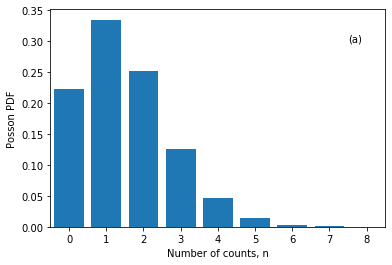

In [9]:
from scipy.stats import poisson
# define variables
n = range(8)
n_bar = 1.5
# generate a Poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)
plt.xlim([-0.5, 8.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(7.5, 0.3, '(a)')

Text(37, 0.08, '(b)')

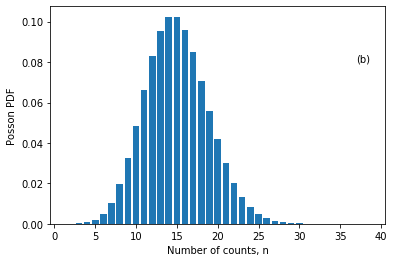

In [10]:
# define variables
n = range(40)
n_bar = 15
# generate a poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)

plt.xlim([-0.5, 40.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(37, 0.08, '(b)')

### 3.4.1 Worked example - Poisson counts
### 3.4.2 Error bars and confidence limits for Poisson statistics
### 3.4.3 Approximations for higher means
### 3.5 The central limit theorem
### 3.5.1 Examples of the central limit theorem
Reproduce the top row of Fig. 3.7. The left-most plot is the PDF for a uniform distribution over (0,1).

Text(0, 0.5, 'Probability Density, f(x)')

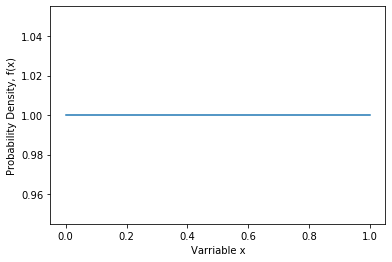

In [11]:
x_var = np.linspace(0, 1, 100)
f = np.ones(x_var.shape)

plt.plot(x_var, f)
plt.xlabel('Varriable x')
plt.ylabel('Probability Density, f(x)')

The center plot is a histogram of 1000 trials.

Text(0, 0.5, 'Occurrence')

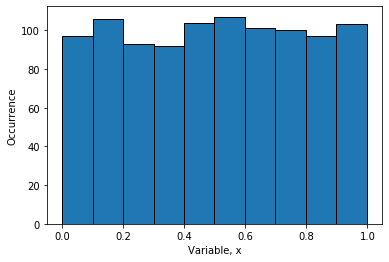

In [12]:
np.random.seed(1)

x = np.random.rand(1000)

plt.hist(x, 10, ec='black')
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')

The right-most plot is a histogram of 1000 trials, where the result of each trial is the mean of five numbers drawn from the uniform distribution. To simplify the computation, note that the mean function operates independently on the columns of an array.

Text(0, 0.5, 'Occurrence')

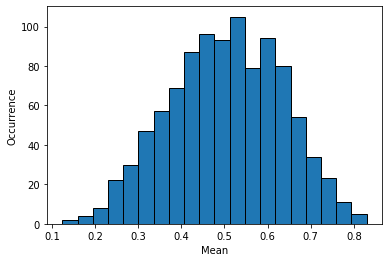

In [13]:
# generage a 5 x 1000 matrix of random numbers
x = np.random.rand(5, 1000)
# calulate the mean value of each column
x_bar = np.mean(x, axis=0)

plt.hist(x_bar, 20, ec='black')
plt.xlabel('Mean')
plt.ylabel('Occurrence')

Let's look at how this evolves from N=2 to N=5, using 10,000 trials to get better statistics.

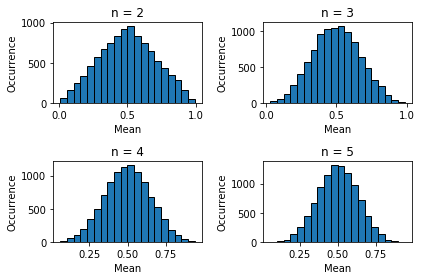

In [14]:
n_start = 2
n_end = 5 + 1
trials = 10000


for i in range(n_start, n_end):

    plt.subplot(2, 2, i - n_start  + 1)

    x = np.random.rand(i, trials)
    x_bar = np.mean(x, axis=0)

    plt.hist(x_bar, 20, ec='black')
    plt.xlabel('Mean')
    plt.ylabel('Occurrence')
    plt.title('n = ' + str(i))
# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()



##### About this notebook
Notebook by J. S. Dodge, 2019. Available from [SFU GitLab](https://gitlab.rcg.sfu.ca/jsdodge/data-analysis-python). The notebook text is licensed under the Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License. See more at [Creative Commons](http://creativecommons.org/licenses/by-nc-nd/4.0/). The notebook code is open source under the [MIT License](https://opensource.org/licenses/MIT).